In [1]:
from assignment4 import *

# Markov Decision Processes

The following two Markov Decision Processes (MDPs) are chosen to be used in this project, because they are relatively simple to verify and easier to visualise as maps and plots. They are also interesting because 

1. Grid World: a replicate from CS4641 Lecture and the famous Berkeley CS 188 Maze example, expressed in explicit transition models and rewards per action
    
    - State Space (size = 12): 3-by-4 grid
        - `X` is blocked tile; on the map
    - Action Space (size = 4): `0`: Up (`^`), `1`: Down (`˅`), `2`: Left (`<`), `3`: right (`>`)
    - Initial State: Bottom left `(2, 0)`
    - Terminal States: `+1` at `(0, 3)` as `+`, or `-1` at `(1, 3)` as `-`; on the map
    - Notation of map (see 2. Value Iteration and Policy Iteration's Grid World Policy with {Value Iteration, Policy Iteration, Q-Learning})

2. Forest: from mdptolbox examples, this MDP simulates the problem of saving versus spending in the context of forest management: waiting for the forest spanning from year `0~(S-1)` to grow or cutting trees off to sell for profit, and with the probability `p = 0.2` a fire will burn down all the trees to force the forest back to the youngest `0`th year stage. If waiting is chosen, the forest will be reaped with a higher reward `r1` provided that the forest reached the oldest `(S-1)`th year, otherwise incurs no reward for the forest at other ages (states) If cutting is chosen, all trees from year `1` to `(S-2)` are seized with reward `1`, and the oldest `(S-1)`th year tree gives reward lower `r2` where `r2 < r1`.

    - State Space (size = S): `S = 50` years
    - Action Space (size = 2): `0`: Wait, `1`: Cut
    - Rewards: `r1 = 30`, `r2 = 60`
    
Obviously, the second MDP has a larger state space, such that we can draw comparison between the two cases.

# Value Iteration and Policy Iteration

As a first attempt, two planning algorithms are employed to solve these MDPs. They are `ValueIteration` and `PolicyIteration`.

## Grid World

Below all charts depict the map with the corresponding arrow symbols, blocked tile, and the terminal positive and negative reward tiles.

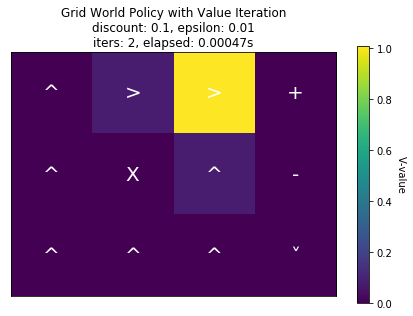

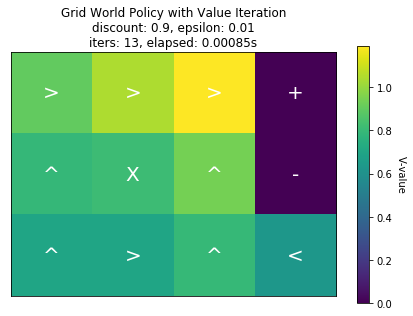

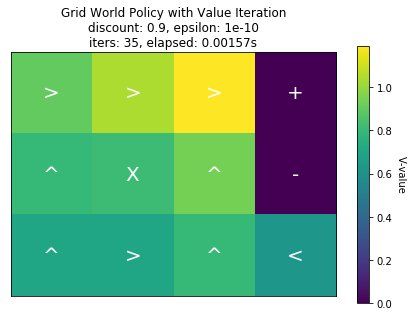

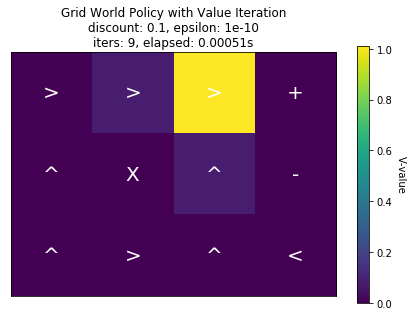

In [4]:
vs1, policy1, iter1, elaped1, desc1 = vi1(discount=0.1, epsilon=1e-2)
vis_grid_world(vs1, policy1, desc1)

vs1, policy1, iter1, elaped1, desc1 = vi1(discount=0.9, epsilon=1e-2)
vis_grid_world(vs1, policy1, desc1)

vs1, policy1, iter1, elaped1, desc1 = vi1(discount=0.9, epsilon=1e-10)
vis_grid_world(vs1, policy1, desc1)

vs1, policy1, iter1, elaped1, desc1 = vi1(discount=0.1, epsilon=1e-10)
vis_grid_world(vs1, policy1, desc1)

Running `ValueIteration` on `GridWorld`, on combinations of high and low discount and epilson, these four maze map with heat map show the results.

Note `discount` and `epilson` are two parameters on `ValueIteration` algorithm.

- Discount: It measures how important is future reward to the present moment. The higher the discount, the greater the weight on future rewards thus the total reward.
- Epsilon: It measures how strict is the stopping criterion. Comparing the current iteration against the previous iteration, the change in value function is measured, and the algorithm will halt upon falling within this tolerance of assumed convergence. There is also maximum number of iterations that if epilson-changed value function cannot be achieved, the algorithm will halt after trying `max_iter` many times.

Observe that the value function magnitude increases from 0 to a positive value more so as `discount` increases. This is because the reward achieved from the terminal states can backtrack further with a greater reward signal.

Increasing `epsilon` increases the fine-grained-ness of the solution, but comparing across the same configuration except with different epsilons, the solution does not improve apparently, and increasing `epsilon` correponding increase the time taken as well as number of iterations.

Most importantly, `ValueIteration` gives a correct policy to travel from the starting point to the terminal state with `+1` reward. It also covers cases where it stumbled into the bottom right corner.

The grid `(0, 2)` that is immediately left to the positive terminal state and in fact the only state that has access to it, holds the highest value. The neighbouring two grids that the agent can get to `(0, 2)` are `(0, 1)` and `(1, 2)`, they have second-highest values as value spreads, in all four configurations.

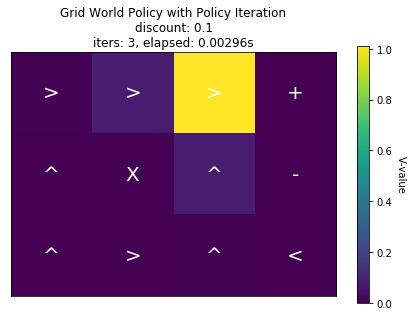

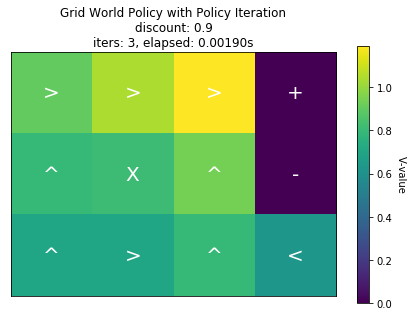

In [5]:
vs2, policy2, iter2, elapsed2, desc2 = pi1(discount=0.1)
vis_grid_world(vs2, policy2, desc2)

vs2, policy2, iter2, elapsed2, desc2 = pi1(discount=0.9)
vis_grid_world(vs2, policy2, desc2)

Running `PolicyIteration` on `GridWorld`, with high and low discount, the only parameter for this algorithm, these two charts show the resultant values and policy.

Similar to `ValueIteration`, increasing `discount` (up to less than `1`) helps with raising the value of all grids.

The resultant policy matches that of `ValueIteration`, but under similar configurations, `PolicyIteration` tends to use fewer iterations. These experiments show that unlike `ValueIteration`, increasing `discount` would not require `PolicyIteration` to take iterations to converge, though time elapsed expands accordingly. The converging criterion for `PolicyIteration` is that the policy of the current iteration did not change from that of the previous iteration. In each iteration, instead of learning the value function explicitly to finally arrive at a good estimate in order to find the policy later, we directly learn the policy and value function back-and-forth. The value function update omits the $\max$ operator and gives linear update equations of all the states. Estimates of value function is provided by the $t$th policy, so overall each step is more expensive, but fewer steps are needed.

Note that `discount = 0.1` for `PolicyIteration` takes in terms of magnitude $10^2$ more time than a `epsilon = 0.01` `ValueIteration`. At `discount = 0.9` against `epsilon = 1e-10`, this drops to comparable values, sharing the same order of magntiude.

Concluding this section, both algorithms give correct policies, but `ValueIteration` is cheaper to compute, `PolicyIteration` is more efficient per iteration.

## Forest

The following charts show the policy and V-value of various configurations of algorithms: we will vary parameters of a given algorithm to see their effects on the performance of the algorithm, and repeat it for all configurations (discount/epsilon/learning rate, etc.)

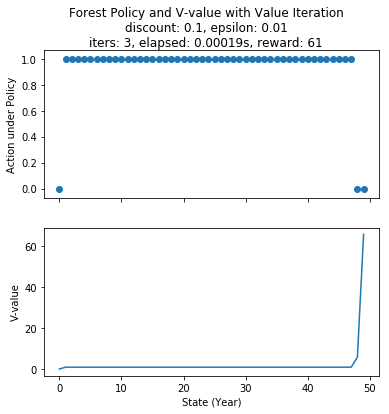

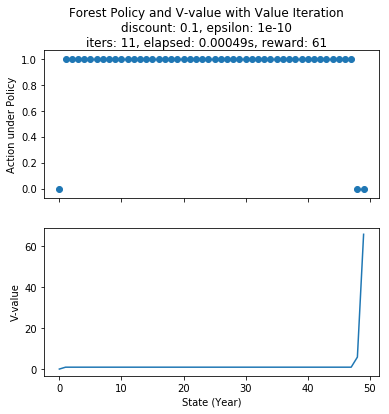

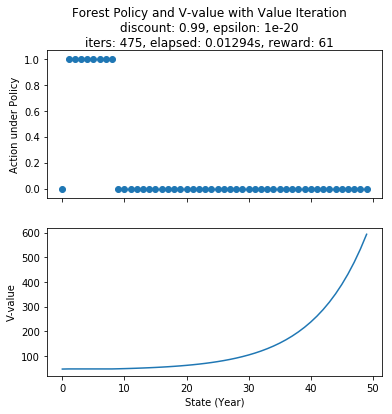

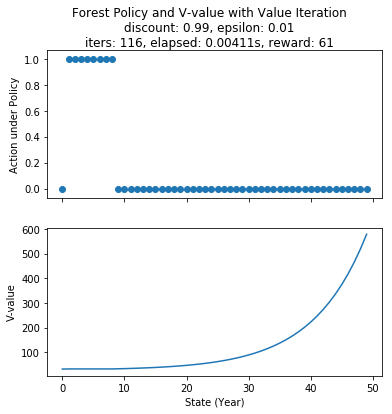

In [6]:
vs1, policy1, iter1, elaped1, desc1 = vi2(discount=0.1, epsilon=1e-2)
vis_forest(vs1, policy1, desc1)

vs1, policy1, iter1, elaped1, desc1 = vi2(discount=0.1, epsilon=1e-10)
vis_forest(vs1, policy1, desc1)

vs1, policy1, iter1, elaped1, desc1 = vi2(discount=0.99, epsilon=1e-10)
vis_forest(vs1, policy1, desc1)

vs1, policy1, iter1, elaped1, desc1 = vi2(discount=0.99, epsilon=1e-2)
vis_forest(vs1, policy1, desc1)

In `ValueIteration`, we observe that low-discount configurations tend to be very greedy, as shown in the numerous cut actions (`1`). It is only towards the very end of the years of the forest, that it finally waits for a few years to reap the final `r1 > r2` reward. Notice that cutting for several times in a row does not help to incur reward, because the trees in the forest, once cut down, takes time to re-grow. The reward structure of this MDP prevents cutting to get immediately benefited from the previous cut, by introducing `0` reward on the youngest forest. Therefore, after the first cut, the other cuts are actually effectively useless.

However, since the policy (action) on any given year (state) is plotted, this result also says about the general strategy that if we happen to have a forest at whichever state in between, the 'best' action is to cut. Though this does not work well, this is an insight provided by low-discount Value Iteration.

For high-discount `ValueIteration`, the policy becomes having waits dominating the action landscape. After several cuts, the policy keeps staying in waits, accumulating the age of the forest. Yet it fails to capitalise on the `1` rewards of the forests that age between `0` and `(50-1)`, that adds up to a considerable reward. Value Iteration could have put a cut action in the last year.

The choice of epsilon remains oblivious, since the policy does not improve much with stricter convergence tolerance.

One noteworthy feature of the policies is that they all decide to wait in the first year, and then cut the next year to secure its `1` reward.

The trend of V-value curve is rather consistent, straightly increasing with increasing years, as the last year holds the greatest reward. Discounting makes the curve smoother up, such that rewards from the far end of the oldest forest can spread to a larger degree to earlier years. This is different from low-discount settings where V-value goes up abruptly near the oldest years.

As a result, all policies, despite having different wait/cut action distributions, end up sharing the same reward, namely the final `r1` plus the inital `1` from the youngest forest. This is clearly suboptimal.

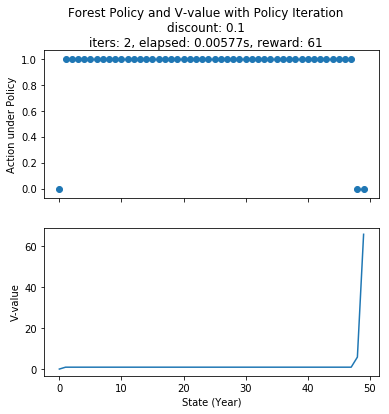

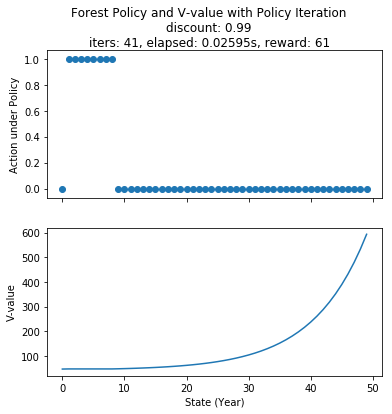

In [2]:
vs2, policy2, iter2, elapsed2, desc2 = pi2(discount=0.1)
vis_forest(vs2, policy2, desc2)

vs2, policy2, iter2, elapsed2, desc2 = pi2(discount=0.99)
vis_forest(vs2, policy2, desc2)

`PolicyIteration` yields highly similar results as `ValueIteration` does. The overall policy, i.e. distribution of wait and cut actions, as well as the V-value curve together with its smoothness, are largely unchanged from value iteration.

In terms of number of iterations, policy iteration triumphs once again with efficient and fewer iterations, especially evident in the high-discount case: `41` vs hundreds of iterations.

In terms of time elapsed however, value iteration takes less time in most cases, except when `discount = 0.99, epsilon = 0.01`. Otherwise the total runtime requirement is lighter for value iteration, echoing what was found in `GridWorld`.

**Effect of state space size**: However both algorithms do not handle this sequential many-state problem very well, and the general policy is rather simplistic. Because both algorithm depends on the value of a given state to determine the corresponding action to take, if the value does not convey useful information about the problem, e.g. when to exploit or when to save stock, they can easily fall prey of hitting suboptimal. As number of states increases, the states start to look less different as opposed to the case `S = 5` for example, where the intermediate states are cloose enough the the youngest and oldest forest states - the details in between the states are lost in the process, in other words these two algorithms ignore the state space size to leverage what a larger space has to offer. An interleaving waits-cut sequence would be a great composing unit of a policy.

# Reinforcement Learning Algorithm: Q-Learning

Next, a reinforcement learning algorithm is picked and run on these two MDPs to explore another option. **`Q-Learning`** as an extended version of `ValueIteration` is chosen.

**Exploration strategy**: in Q-Learning, exploration strategy is captured by the parameter `exploration_interval`. During the training phase of a fixed `n_iter = 10000` iteraions, in every such interval, a random state is sampled and jumped to. By changing this parameter, we explore the effect of exploration on the performance of Q-Learning.

Note that as the number of configurations vary between `discount`, `learning_rate` and `exploration_interval`, there are many experiments to conduct thus charts to plot. In the following, compact nested charts are used instead.

## Grid World

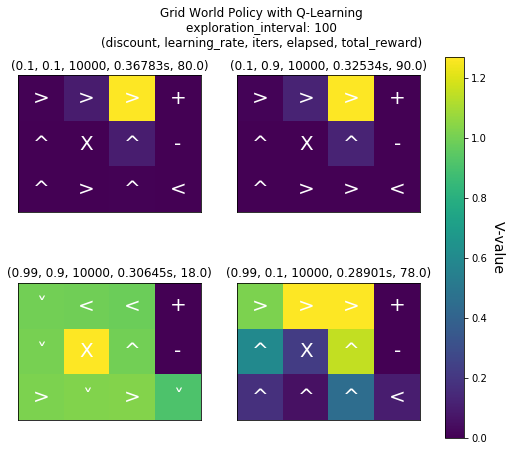

In [2]:
vis_grid_world_cross(ex_frac=0.01)

At a medium exploration fraction of 0.01 (1% of the time, i.e. `exploration_interval = 100`), the policies are quite different from those in `ValueIteration` and `PolicyIteration` except the first one with `discount = 0.1, learning_rate = 0.1` being the same. Increasing learning rate makes the policy becomes more reliant on the newly learnt Q-value, and giving less weight to the previous Q-value. This could make the actions tend to be fairly short short-sighted and lose track of reasonable good policies. Bottom left `discount = 0.99, learning_rate = 0.9` is a good example where the learnt policy is essentially circulating the blocked tile, leading to extremely low reward (`18`). Increasing discount achieve the same outcome as in previous cases: to spread value across to more states. Bottom right `discount = 0.99, learning_rate = 0.1` gives roughly a correct policy, with proper value signals that travels away from around the positive reward tile.

Q-Learning takes significantly longer time elapsed and more iterations. Even for the slower algorithms in value and policy iteration, they take an order of `1e-3` seconds to run, but here is straightly requires `1e-1`. Q-Learning also requires more iterations to refine the function estimates, and take note that the size of the table is not just `(S,)` but `(S, A)` now.

Total reward is calculated by summing all the rewards received during the course of training, as an indicator of policy quality. The best policy is achieved by `discount = 0.1, learning_rate = 0.9` among the four.

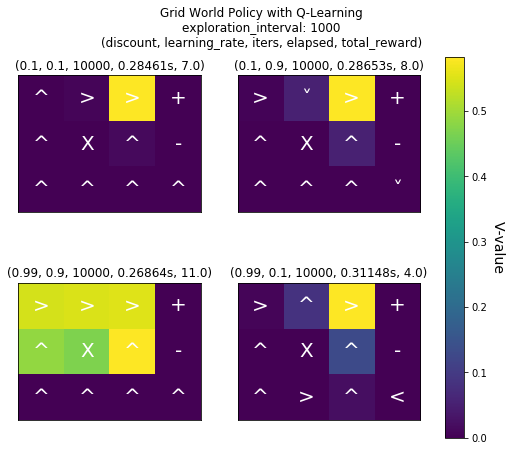

In [10]:
vis_grid_world_cross(ex_frac=0.1)

Now we spread out the interval to explore every 1000 iterations. First notice that the V-value scale is shrinked for about half the size. The total training rewards also become signigicantly smaller. Having less exploration actually makes the policy action less desirable, as shown in the action for `(0, 1)` in the upper right and bottom right configurations, that it does not move toward `(0, 2)`. As a result, Q-Learning cannot discover actions that are more optimal to take.

The best configuration amongst is `discount = 0.99, learning_rate = 0.9` with reward `11`, but it is still very poor when compared to other configurations of lower `exploration_interval`.

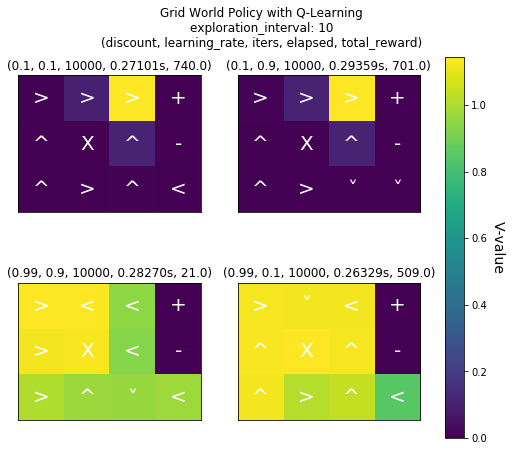

In [8]:
vis_grid_world_cross(ex_frac=0.001)

Finally we make exploration even more frequenct than initially, with `exploration_interval = 10`. With active exploration, the best policy emerges to match that of `ValueIteration` and `PolicyIteration` in the low-discount low-learning-rate upper left case, with reward `740`. Exploration can hamper the performance in some cases, like the bottom left high-discount high-learning-rate scenario, where randomness introduced together with the effect of a highly forgetful learning pattern (high learning rate) makes actions chaotic and far from optimal.

In conclusion for `GridWorld`, `ValueIteration` and `PolicyIteration` are deemed more ideal than `Q-Learning` in solving the given MDP, because for a good policy solution it takes less resources to achieve so, and less noise.

## Forest

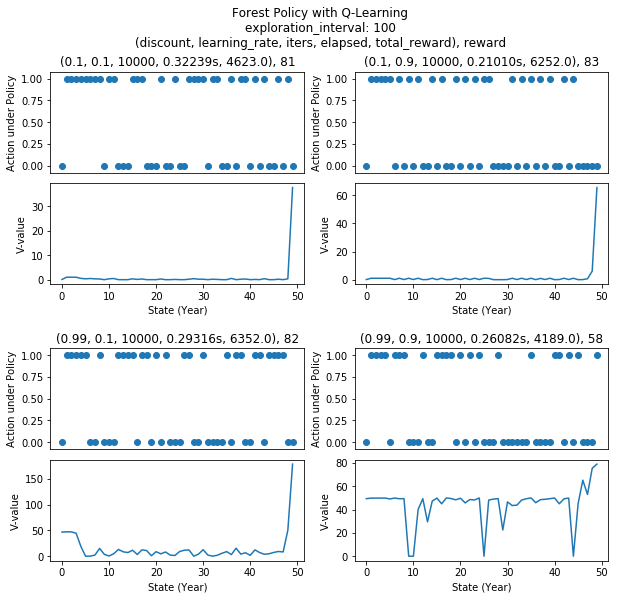

In [5]:
vis_forest_cross(ex_frac=0.01)

Here we introduce exploration to the problem of `Forest`. At medium exploration (`exploration_interval = 100`), we can already see much better choice of policies. Also starting from the action `wait`, all the 4 policies stay at `cutting` for a while before oscillating between waiting and cutting every few or not one state. This shows that `Q-Learning` successfully capture the rewards exploitable in the `waits`, to land at a higher reward (not that `reward` refers to the policy reward, i.e. if we follow the policy, we get such rewards; `total_reward` is the training reward sum).

The first three configuration has highly similar rewards and value function curve, showing that a better policy for forest can be attained under both high and low discount and learning rate, in the case of medium exploration. Note that for the bottom right (fourth) configuration, it has lower reward only because the last action was cut not wait, if not it would also have reward higher than `80`. Its value function curve is highly fluctuated, with all the sharp minima correponding to periods of waits. It has the highest average V-value across states compared to the other 3 settings. This can be explained by the high-discount high-learning-rate configuration again, as short-term learnt reward is amplified by the high discount in favour for future rewards.

In the same vein as `Q-Learning` on `GridWorld`, time elapsed is also kept at multiples of `1e-1`.

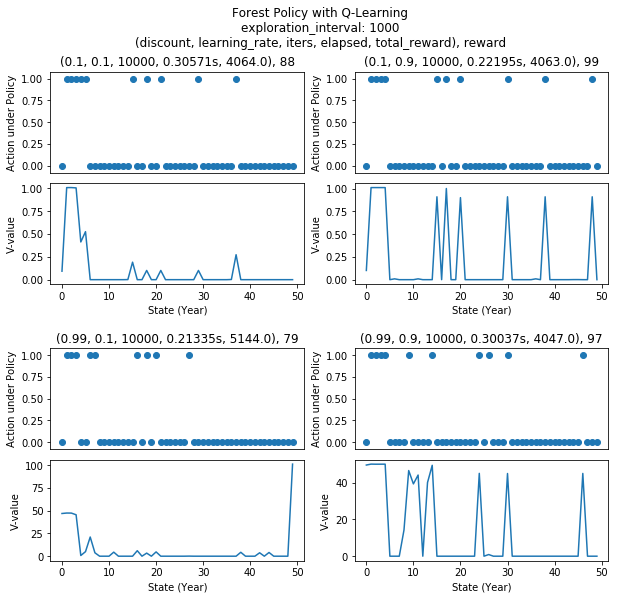

In [6]:
vis_forest_cross(ex_frac=0.1)

Making exploration less frequent such that `exploration_interval = 1000`, we see more `wait` actions than before, but they are all properly captured by a `cut` action some number of states after then. The first and last states are waited.

The increase in waits made this exporation interval a better choice than `100`, because there are fewer wasted consecutive cuts, instead those states are used for accumulating the years to be reaped later. A novel pattern in all these configuration is that, seldom would cuttings clump together, apart from the first string that always appear. This distribution makes collecting rewards more state-efficient, to make good use of the many states.

The value functions see interesting trends, where there are spikes at the `cut` instants to reflect a reap of reward. Being at those states given that the policy is followed, would readily give out the stored rewards from the waits.

The best configuration is `discount = 0.1, learning_rate = 0.9`'s reward `99`. This is in fact the best for all exploration intervals too. Here, high learning rate appears to give out about more than `+10` reward, since the spikes are seen much more frequently.

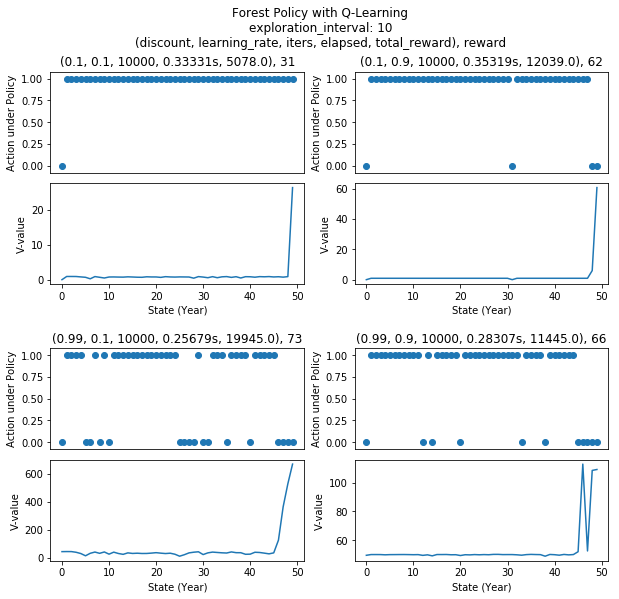

In [7]:
vis_forest_cross(ex_frac=0.001)

Lowering the exploration interval to `10`, thus making exploration very active, results in a greedy algorithm that cuts too often. As shown in the policy charts, now that most states are spent cutting trees down, there are far fewer trees waited to be extracted of various reward `1`. This restores to the situation seen in `ValueIteration` and `PolicyIteration` with similarly shaped value function and populated `cut`s.

We can now see that increasing exploration interval (less often to explore) actaully encourages more waits, thus more utilisable rewards. None of the configurations in this exploration interval wins over one configuration in `exploration_interval = 1000` in terms of rewards.

All in all, in `Forest`, with as many as `S = 50` states, at less-often but legitimate exploration, `Q-Learning` solves it best to maximise rewards. It successfully takes into account the implication of having more states that adjustments have to be maed in the middle states.

This is made possible by learning a representation not only consisting of values of states, but a richer representation of values of state-action pairs. This way, the consequences of taking an action (wait/cut) at a given state is also considered, more robust decisions can be then made.

# Conclusion

We close this paper by discussing the relative strengthes of the algorithms. `ValueIteration` and `PolicyIteration` ace at simpler problems involving a handful of states, and when time and iterations are important constraint to obey. To prefer cheap and fast attempts, choose `ValueIteration`; for more accurate and efficient-per-iteration attempts, choose `PolicyIteration`. However there are cases where these two algorithms suffer from suboptima as they take the MDP too simply. As number of states increase and especially in cases where the more reward signal were not provided to fill in the state space like `Forest` do (sparsity), `Q-Learning` performs way better to more holistically consider the right actions to take to maximise long-term rewards, at the expense of considerably more but still affordable running time. Note that the exploration extent encoded as exploration interval has to be set appropriately to arrive at a suitable balance of exploration and exploitation, otherwise `Q-Learning` would be at worst a slower version of `Value/PolicyIteration` in terms of solution quality.

# Credits

https://github.com/auimendoza/cs7641-omscs-a4/blob/master/mdplib.py for modified QLearning